In [1]:
# （必須）モジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 表示設定
np.set_printoptions(suppress=True, precision=3)
pd.set_option('display.precision', 3)    # 小数点以下の表示桁
pd.set_option('display.max_rows', 10)   # 表示する行数の上限
pd.set_option('display.max_columns', 20)  # 表示する列数の上限
%precision 3

'%.3f'

# 付録

## プログラミング環境

### JupyterとPythonスクリプトの使い分け

 Jupyterは短いコードを逐次実行しながら結果を確認するのには適しているが，コードが長くなると分かりにくくなる．そこで，コードが長くなってきたら関数やクラスに適宜まとめてスクリプト（`.py`ファイル）に保存すると良い．保存したスクリプトはNumPyやPandasと同じようにimportできるので，Jupyter上ではimportしたスクリプト内の関数を実行するだけにすると結果が整理しやすい．その際，以下に説明する自作モジュールの自動リロードの設定をしておくと便利である．
 
※ ローカル環境で`.py`ファイルを編集するにはエディタを使用する．Windowsに標準搭載されているメモ帳を使うのが最も手軽だが，非常に使いづらいので推奨しない．まずは自分の好みに合うエディタを探すことを推奨する．よく使われるエディタは以下の通り：

- Visual Studio Code（推奨）
- Atom
- Sublime Text

### Jupyterのconfigファイル
- ターミナルで以下を実行する
    ```
    jupyter notebook --generate-config
    ```
    - `C:\Users\username\.jupyter`の中に`jupyter_notebook_config.py`というファイルができる．
- `jupyter_notebook_config.py`を開いて以下を追加
    ```
    c=get_config()
    c.NotebookApp.notebook_dir="起動ディレクトリのパス"
    ```
- これにより，Jupyter Labを起動したときに指定したフォルダが開かれる

### Ipythonのプロファイル

Ipythonプロファイルを作成すると，jupyterの起動時に自動実行したいコマンドを設定できる．

- ターミナルで以下を実行する
    ```
    ipython profile create profile_name
    ```
    - `C:\Users\username\.ipython\prifile_name`に`startup`フォルダが作成される．
- `startup`フォルダの中に`00.ipy`というファイル（スタートアップスクリプト）を作り，自動実行したいコマンドを記述する．
- 例えば，以下はよく使うので自動importしておくと良い

    ```python
    import os
    import sys
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    ```
- 自作のモジュール（例えば`my_module.py`）をimportして使う場合，`my_module.py`を一度jupyterでimportした後に，ローカルで`my_module.py`を変更することがよくある．このとき，ローカルで行った変更内容はjupyter側には自動で反映されない．そこで，スタートアップスクリプトに以下を加えておくと自作モジュールの変更が自動で反映される．
  
    ```
    %load_ext autoreload
    %autoreload 2
    %matplotlib inline
    ```

例として，`sport_data`フォルダの中に`module`フォルダを作り，以下のプログラムを`my_module.py`として保存する．

```python
def my_func():
    for i in range(5):
        print("test%s" % i)

if __name__ == '__main__':
    my_func()
```
つまり，このPythonスクリプトのパスは`C:\Users\username\OneDrive\sport_data\module\my_module.py`となる．

これを単にPythonスクリプトとして実行すると，`if __name__ == '__main__':`以下のコマンドが実行される：

```python
%run "./module/my_module.py"
```

一方，これをモジュールとしてインポートするには以下のようにする：

```python
import module.my_module as mm
```

この状態で`my_module`内の関数`my_func()`を以下のように`mm.my_func()`として実行できる：

```python
mm.my_func()
```

スタートアップスクリプト内にautoreloadの設定を書いている場合は，ローカルで`my_module.py`を書き換えたら即座に変更内容が反映されるはずである．

```python
mm.my_func()
```

### Google Colab

Google Colab（正式名称はGoogle Colaboratoty）はgoogleが提供するPython実行環境であり，Jupyter Notebookがベースになっている．
実際，Google Colabで作成したノートブックは".ipynb形式"で保存されるので，相互互換性がある．
Google Colabの特徴は以下の通りである：

- ブラウザ上で動作する
- 基本操作はJupyter Notebookと似ている（細かい操作方法は異なる）
- 作成したノートブックはGoogle Drive上に保存される
    - Google Driveが必要（なのでGoogle アカウントも必要）
- pythonの環境構築が不要（新たにモジュールをインストールすることも可能）
- 無料でGPUを使用可能

特に，Jupyter Notebookの場合は自分のPC上にpython環境を構築する必要があるが，Google Colabはその必要がない点がメリットである．
また，GPUが無料で使用可能なので，重い計算を行う際にも重宝する．
本講義では，基本的にJupyter Labを用いるが，Google Colabを用いても問題ない．

#### Google colabでjupyter notebookを開く

- Google Driveを開いて作業フォルダに移動
- 既存の`.ipynbファイル`を選択するとGoogle Colabが開く
- 新規作成作成の場合は以下
    - ［右クリック］→［その他］→［Google Colaboratory］

#### 必要なモジュールをimportする

- google colabにインストールされていないモジュール（japanize_matplotlibなど）

    ```python
    !pip install japanize-matplotlib
    import japanize_matplotlib
    ```
- 既にインストールされているモジュール

    ```python
    import numpy as np
    ```

#### Google Driveをマウントする

Google Driveに保存した自作モジュールやファイルにアクセスしたい場合はGoogle Driveをマウントする必要がある．

- 以下を実行する
  
    ```python
    from google.colab import drive
    drive.mount('/content/drive')
    ```
- 「このノートブックにGoogleドライブのファイルへのアクセスを許可しますか？」と聞かれるので「Google ドライブに接続」を選択
- 自分のGoogleアカウントを選択し，「許可」を選択

#### 自作モジュールをimportする

```python
import sys
sys.path.append('/content/drive/My Drive/***')

import ***.xxx
```
※ なお，自作モジュールの変更を反映したい場合は［ランタイムを出荷時設定にリセット］し，再度マウントする

#### matplotlibのスタイルファイルを読み込む

```python
import matplotlib.pyplot as plt
plt.style.use('/content/drive/My Drive/***/matplotlibrc')
```

## NumPy

(numpy_fancy_index)=
### ファンシーインデックス参照

インデックス参照では1つの要素だけにしかアクセスできなかった．
また，配列のスライスでは，複数の要素を抽出できたが，連続した要素や1つおきの要素など規則的な抽出しか実現できなかった．
そこで，任意の要素を複数抽出する方法として，ファンシーインデックス参照がある．
これは，複数のインデックスを配列として指定するという方法であり，NumPy配列特有の機能である．

#### 1次元配列の場合

In [2]:
x = np.random.randint(100, size=10)
x

array([25, 75, 61, 46, 90, 49, 89, 60, 63, 61])

In [3]:
# 3番目,4番目,7番目要素
x[[3, 4, 7]]

array([46, 90, 60])

In [4]:
# 3番目,7番目,4番目要素（順番が異なる）
x[[3, 7, 4]]

array([46, 60, 90])

In [5]:
# 3番目要素を5個
x[[3, 3, 3, 3, 3]]

array([46, 46, 46, 46, 46])

以下のように，インデックスを2次元配列で与えると，抽出された配列も同じ形状となる．

In [6]:
# 2次元のインデックス配列を与える
x[np.array([[3, 7], [4, 5]])]

array([[46, 60],
       [90, 49]])

#### ２次元配列の場合

通常のインデックス参照と同様に，行→列の順で指定する．
1次元のインデックス配列を指定すると，複数の行を抽出できる．

In [7]:
x2 = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11]])
x2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
# 第0行と第2行を抽出
x2[[0, 2]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

複数の列を抽出するには，スライスと組み合わせる．

In [9]:
# 第1列と第3列を抽出
x2[:, [1, 3]]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

2次元配列の複数の要素を一辺に抽出することもできる．
例えば，以下は`x2[0, 2], x2[1, 1], x2[2, 3]`を抽出する例である．

In [10]:
x2[[0, 1, 2], [2, 1, 3]]

array([ 2,  5, 11])

### 条件を満たす要素のインデックスを取得

`np.where`関数を用いると，配列の中で条件を満たす要素のインデックスを取得することができる．

In [11]:
x1 = np.random.randint(0, 100, 10)
x1

array([72, 63, 30, 35, 40, 44, 54, 64, 17, 46])

In [12]:
np.where(x1 > 50)

(array([0, 1, 6, 7]),)

この場合，インデックスが0,2,9の要素が条件を満たしている．ただし，上のようにタプルが返るので注意する．

2次元の場合には以下のようになる．

In [13]:
x2 = np.array([[1,2,3], [4,5,6]])
x2

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
np.where(x2 < 4)

(array([0, 0, 0]), array([0, 1, 2]))

この場合，戻り値は`(行方向のインデックス配列, 列方向のインデックス配列)`となる．
つまり，条件を満たすインデックスは`(0, 0), (0, 1), (0, 2)`である．

(numpy_change_shape)=
### 配列の形状変更

#### 要素数を保った形状変更

配列のサイズ（全要素数）を保ったまま形状（次元数）を変更するには`reshape`メソッドを用いる．
例えば，1次元配列を3行3列の配列に変更するには次のようにする．

In [15]:
x1 = np.arange(1, 10)
x1

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
# 1次元配列を3行3列に変更
x2 = x1.reshape(3, 3)
x2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

ただし，元の配列と形状変更後の配列のサイズは同じでなければならない．

In [17]:
print(x1.size)
print(x2.size)

9
9


配列の形状を指定する際に１つの次元だけ`-1`とすると，他の次元から自動的にサイズを補完してくれる

In [18]:
x1.reshape((-1, 3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

これを使うと，2次元配列を1次元配列に変更することができる．

In [19]:
x2.reshape(-1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

#### 配列の連結

複数のNumpy配列を連結するには，`concatenate`関数を用いる．
また，同様の機能を持つ関数として，`block`関数，`vstack`関数，`hstack`関数があるがここでは触れない．

In [20]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = np.array([99, 99, 99])

In [21]:
# 2つの1次元配列の連結
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [22]:
# 複数の1次元配列の連結
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

2次元配列の場合には連結方向を指定する．
連結方向は縦方向（行方向）の場合`axis=0` ，横方向（列方向）の場合`axis=1`とする．

In [23]:
x2 = np.array([[1,2,3], [4,5,6]])
y2 = np.array([[7,8,9], [10,11,12]])

In [24]:
# 縦（行方向）に連結
np.concatenate([x2, y2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [25]:
# 横（列方向）に連結
np.concatenate([x2, y2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

#### 配列の削除

`np.delete`関数で配列から任意の行や列を削除できる．

In [26]:
x = np.arange(12).reshape(3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
# 第1行を削除
np.delete(x, 1, axis=0)

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [28]:
# 第0行と1行を削除
np.delete(x, [0, 1], 0)

array([[ 8,  9, 10, 11]])

In [29]:
# 第1列を削除
np.delete(x, 1, axis=1)

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11]])

In [30]:
# 第1列と第3列を削除
np.delete(x, [1, 3], axis=1)

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

(numpy_broadcast)=
### 異なる形状の配列間での演算：ブロードキャスト

NumPy配列では以上の規則を含む**ブロードキャスト**と呼ばれる演算規則が存在する．
ブロードキャストとは，異なる形状・サイズの配列同士で演算を行う場合に，一方または両方の配列の形状・サイズを自動的に変更（ブロードキャスト）する仕組みである．

ブロードキャストは以下のルールに従う：
- ルール1：2つの配列の次元数（ndim）を揃える
    - ２つの配列の次元数（ndim）が異なる場合，次元数が少ない方の配列の次元を1つ増やす．
    - 増やした次元のサイズは1とする．
- ルール2：2つの配列の形状（shape）を揃える
    - 2つの配列の各次元の長さが異なる場合，サイズが1の次元に限り他方の配列に合うようにサイズを引き伸ばす．
    - これにより形状が合わない場合はエラーとなる．

In [31]:
x2 = np.array([[1,2,3], [4,5,6]])
print('shape:', x2.shape)
print('ndim:', x2.ndim)
x2

shape: (2, 3)
ndim: 2


array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
y1 = np.array([[1], [2]])
print('shape:', y1.shape)
print('ndim:', y1.ndim)
y1

shape: (2, 1)
ndim: 2


array([[1],
       [2]])

In [33]:
z1 = np.array([1, 2, 3])
print('shape:', z1.shape)
print('ndim:', z1.ndim)
z1

shape: (3,)
ndim: 1


array([1, 2, 3])

In [34]:
# 形状(2, 3)と(2, 1)
x2+y1

array([[2, 3, 4],
       [6, 7, 8]])

In [35]:
# 形状(2, 3)と(1, 3)
x2+z1

array([[2, 4, 6],
       [5, 7, 9]])

In [36]:
# 形状(2, 1)と(1, 3)
y1+z1

array([[2, 3, 4],
       [3, 4, 5]])

以下はエラーになる

In [37]:
x2_2 = np.array([[1,2,3], [4,5,6], [7,8,9]])
print('shape:', x2_2.shape)
print('ndim:', x2_2.ndim)
x2_2

shape: (3, 3)
ndim: 2


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [38]:
# 形状(3, 3)と(2, 1)：エラーが出る
x2_2 + y1

ValueError: operands could not be broadcast together with shapes (3,3) (2,1) 

## Pandas

### Seriesオブジェクト

Pandasには，DataFrameの他に1次元のデータを扱うためのSeriesオブジェクトが用意されている．DataFrameには行ラベルindexと列ラベルcolumnsが付与されたが，**Seriesにはindexだけが付与される**．**SeriesはDataFrameから特定の1列を抜き出したものであり，基本的な操作方法はDataFrameと同じである**．実際のデータ分析においてSeriesを単体で用いることはあまりないが，DataFrameを１列だけ取り出したり，ブールインデックスを扱ったりすると遭遇する．

SeriesはDataFrameから1列または1行を取り出すことで生成できる．
また，`pd.Series`関数により，リスト，NumPy配列，辞書などから生成することもできる．

In [135]:
df = pd.read_csv('./df_sample.csv',\
                 header=0, index_col=0, usecols=None)
df['t']

A      2
B     64
C    350
D    600
Name: t, dtype: int64

In [42]:
type(df['t'])

pandas.core.series.Series

In [43]:
# リストから作成
sr = pd.Series([0.25, 0.5, 0.75, 1.0],
               index = ['A', 'B', 'C', 'D'])
sr

A    0.25
B    0.50
C    0.75
D    1.00
dtype: float64

Seriesオブジェクトの属性や参照の方法はDataFrameと同じである．

In [44]:
# NumPy配列に変換
sr.values

array([0.25, 0.5 , 0.75, 1.  ])

In [45]:
# ラベルを取得
sr.index

Index(['A', 'B', 'C', 'D'], dtype='object')

In [46]:
# ラベル'A'の要素を取り出す
sr['A']

0.250

In [47]:
# loc属性でラベル'A'の要素を取り出す
sr.loc['A']

0.250

In [48]:
# iloc属性で0番目要素を取り出す
sr.iloc[0]

0.250

### 指定したラベルの順に並べ替える：`reindex`メソッド

`reindex`メソッドを用いると，指定した行・列ラベルの順番にDataFrameを並べ替えることができる．<br>
なお，単にラベルを昇順・降順に並べ替えたい場合は既に説明した`sort_index`メソッドを用いた方が良い．

In [49]:
# 指定した行ラベルの順に並び替え
df.reindex(index=[0, 1, 2, 3])

,t,player,x,y
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


In [50]:
# 指定した列ラベルの順に並び替え
df.reindex(columns=['c', 'a', 'b'])

,c,a,b
A,NaN,NaN,NaN
B,NaN,NaN,NaN
C,NaN,NaN,NaN
D,NaN,NaN,NaN


In [51]:
# 新たなラベルの指定
df.reindex(index=[0, 1, 2, 3, 4, 5])

,t,player,x,y
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


In [52]:
# 新たなラベルを指定し，欠損値を穴埋め
df.reindex(index=[0, 1, 2, 3, 4, 5], fill_value=0)

,t,player,x,y
0,0,0,0.0,0.0
1,0,0,0.0,0.0
2,0,0,0.0,0.0
3,0,0,0.0,0.0
4,0,0,0.0,0.0
5,0,0,0.0,0.0


### データの結合

複数のDataFrameがあったとき，これらを結合する方法として，`concat`関数，`merge`関数，`join`関数が用意されている．
`concat`関数は縦方向と横方向に連結ができる．
一方，`merge`関数と`join`関数は横方向に連結する関数であり，`merge`関数は特定の列，`join`関数はindexを基準に連結する．
ここでは，`concat`関数だけを説明する．

**`concat`関数**

`concat`関数は次の形式で実行する：
```python
pd.concat([df1, df2, ...], axis=0, join='outer')
```
`axis`引数に0を指定すると縦方向，1を指定すると横方向に連結される（デフォルトは0）．
`join`引数は`'outer'`または`'inner'`を指定する（デフォルトは`'outer'`）．挙動は以下で説明する．

In [53]:
df1 = pd.DataFrame(np.arange(0, 6).reshape(2, 3),
                   columns=['a', 'b', 'c'])
df1

,a,b,c
0,0,1,2
1,3,4,5


In [54]:
# 列ラベルが一部異なるDataFrame
df2 = pd.DataFrame(np.arange(6, 12).reshape(2, 3),
                   columns=['a', 'e', 'f'])
df2

,a,e,f
0,6,7,8
1,9,10,11


In [55]:
# 行ラベルが一部異なるDataFrame
df3 = pd.DataFrame(np.arange(6, 12).reshape(2, 3), 
                   columns=['d', 'e', 'f'],
                   index=[1, 2])
df3

,d,e,f
1,6,7,8
2,9,10,11


**縦方向の連結（`axis=0`）**

縦に連結する場合は`axis=0`を指定する．列ラベル（columns）が同じ場合，そのまま縦に連結される．連結するDataFrameは2個以上でも良い．

In [56]:
# 縦に連結（列ラベルが同じ場合）
pd.concat([df1, df1, df1], axis=0)

,a,b,c
0,0,1,2
1,3,4,5
0,0,1,2
1,3,4,5
0,0,1,2
1,3,4,5


列ラベルが一部異なる場合，新たな列が追加される．

In [57]:
# 縦に連結（列ラベルが一部異なる場合）
pd.concat([df1, df2], axis=0)

,a,b,c,e,f
0,0,1.0,2.0,NaN,NaN
1,3,4.0,5.0,NaN,NaN
0,6,NaN,NaN,7.0,8.0
1,9,NaN,NaN,10.0,11.0


`join='inner'`を指定すると，ラベルが共通の列だけが残る．

In [58]:
# 縦に連結（列ラベルが一部異なる場合）
pd.concat([df1, df2], axis=0, join='inner')

,a
0,0
1,3
0,6
1,9


**横方向の連結（axis=1）**

横に連結する場合は`axis=1`を指定する．行ラベル（index）が同じ場合，そのまま横に連結される．

In [59]:
# 横に連結（行ラベルが同じ場合）
pd.concat([df1, df1], axis=1)

,a,b,c,a,b,c
0,0,1,2,0,1,2
1,3,4,5,3,4,5


行ラベルが一部異なる場合，新たな行が追加される

In [60]:
# 横に連結（行ラベルが一部異なる場合）
pd.concat([df1, df3], axis=1)

,a,b,c,d,e,f
0,0.0,1.0,2.0,NaN,NaN,NaN
1,3.0,4.0,5.0,6.0,7.0,8.0
2,NaN,NaN,NaN,9.0,10.0,11.0


`join='inner'`を指定すると，ラベルが共通の行だけが残る．

In [61]:
# 横に連結（行ラベルが同じ場合）
pd.concat([df1, df3], axis=1, join='inner')

,a,b,c,d,e,f
1,3,4,5,6,7,8


### データの重複処理

**重複データの削除（`drop_duplicates`メソッド）**

pandasで重複したデータを削除するには`drop_duplicates`メソッドを用いる．`drop_duplicates`メソッドは以下のように指定する：
```
    df.drop_duplicates(keep='first', subset=['列名1', '列名2', ...])
```
`keep`引数は重複した複数行のうち，削除しないで残す（keepする）行を指定する．デフォルトでは`keep='first'`となっており，重複した行のうち最初の行が残る．`keep='last'`とすると最後の行が残り，`keep=False`とすれば重複する全ての行が削除される．
また，デフォルトでは全ての列の値が一致しているときに重複と見なされるが，特定の列だけで判断したい場合は`subset`引数に列名のリストを指定する．

In [62]:
dict_data = {'t':[2, 64, 64, 350, 600, 600, 600],    
             'player':['ozora', 'misaki', 'misaki', 'wakabayashi', 'hyuga', 'hyuga', 'hyuga'],
             'x':[5.0, 20.0, 20.0, 10.5, 32.5, 32.5, 32.5],
             'y':[10.0, 1.0, 1.0, 50.5, 2.5, 2.5, 2.5]}
df = pd.DataFrame(dict_data)
df

,t,player,x,y
0,2,ozora,5.0,10.0
1,64,misaki,20.0,1.0
2,64,misaki,20.0,1.0
3,350,wakabayashi,10.5,50.5
4,600,hyuga,32.5,2.5
5,600,hyuga,32.5,2.5
6,600,hyuga,32.5,2.5


In [63]:
# 重複する最初の行を残す
df.drop_duplicates(keep='first', subset=None)

,t,player,x,y
0,2,ozora,5.0,10.0
1,64,misaki,20.0,1.0
3,350,wakabayashi,10.5,50.5
4,600,hyuga,32.5,2.5


In [64]:
# 重複する最後の行を残す
df.drop_duplicates(keep='last', subset=None)

,t,player,x,y
0,2,ozora,5.0,10.0
2,64,misaki,20.0,1.0
3,350,wakabayashi,10.5,50.5
6,600,hyuga,32.5,2.5


In [65]:
# 重複する全ての行を削除
df.drop_duplicates(keep=False, subset=None)

,t,player,x,y
0,2,ozora,5.0,10.0
3,350,wakabayashi,10.5,50.5


**重複データの検出（`duplicated`メソッド）**

重複したデータを検出するには`duplicated`メソッドを用いる．`duplicated`メソッドは以下のように指定する：
```
    df.duplicated(keep='first', subset=['列名1', '列名2', ...])
```
`duplicated`メソッドを適用すると，重複した行をTrue，それ以外の行をFalseとするブール値のSeriesが得られる．
`keep`引数は重複した複数行のうち，検出しない行を指定する（重複を削除するときに残る行なのでkeep)．デフォルトでは`keep='first'`となっており，重複した行のうち最初の行がFalseとなる．`keep='last'`とすると最後の行がFalseとなり，`keep=False`とすれば重複する全ての行がTrueとなる．
また，デフォルトでは全ての列の値が一致しているときに重複と見なされるが，特定の列だけで判断したい場合は`subset`引数に列名のリストを指定する．

In [66]:
df.duplicated(keep=False, subset=None)

0    False
1     True
2     True
3    False
4     True
5     True
6     True
dtype: bool

In [67]:
df.duplicated(keep='first', subset=None)

0    False
1    False
2     True
3    False
4    False
5     True
6     True
dtype: bool

In [68]:
df.duplicated(keep='last', subset=None)

0    False
1     True
2    False
3    False
4     True
5     True
6    False
dtype: bool

In [69]:
df.duplicated(keep=False, subset=['t', 'player', 'x'])

0    False
1     True
2     True
3    False
4     True
5     True
6     True
dtype: bool

重複した行はブールインデックス参照によって抽出できる．

In [70]:
# 重複する全ての行を検出
df.loc[df.duplicated(keep=False, subset=None)]

,t,player,x,y
1,64,misaki,20.0,1.0
2,64,misaki,20.0,1.0
4,600,hyuga,32.5,2.5
5,600,hyuga,32.5,2.5
6,600,hyuga,32.5,2.5


In [71]:
# 重複する最初の行は検出しない
df.loc[df.duplicated(keep='first', subset=None)]

,t,player,x,y
2,64,misaki,20.0,1.0
5,600,hyuga,32.5,2.5
6,600,hyuga,32.5,2.5


In [72]:
# 重複する最後の行は検出しない
df.loc[df.duplicated(keep='last', subset=None)]

,t,player,x,y
1,64,misaki,20.0,1.0
4,600,hyuga,32.5,2.5
5,600,hyuga,32.5,2.5


## Matplotlib
(matplotlib_output)=
### 描画結果の出力先

Matplotlibは使う環境によってグラフを画面に出力する方法が異なる．
ここではJupyter NotebookとPythonスクリプトでの出力方法を解説する．

**（デフォルト）Jupyter Labで実行し，Notebook内に表示する**

Jupyterのマジックコマンド`%matplotlib`の後に`inline`を指定すると，コードセルの下に描画結果が表示される．
デフォルトではこの設定になっているはずである．

In [73]:
# notebook内に出力する
%matplotlib inline

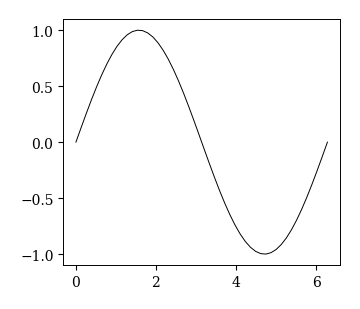

In [74]:
fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi)
plt.plot(x, np.sin(x));

**Jupyter Labで実行し，別ウインドウに表示する**

Jupyterのマジックコマンド`%matplotlib`の後に`tk`を指定すると，描画結果が別画面に出力される．

In [12]:
# 別ウインドウに出力する
%matplotlib tk

なお，'inline'や'tk'はバックエンドと呼ばれ，以下が利用可能である．

In [76]:
import matplotlib
# 現在のバックエンドを確認
print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline


In [77]:
# 利用可能なバックエンドのリストを表示
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


(matplotlib_style)=
### ２つのプロットスタイル

**FigureとAxes**

Matplotlibの描画エリアは下図のようにFigureオブジェクト, Axesオブジェクトという要素で構成されている．
Figureは描画エリア全体を表し，その中に複数のAxes（座標軸）が存在するという構造になっている．
グラフのプロットや装飾はAxesオブジェクト（座標軸）のメソッドを用いて行う．

```{figure} ../figure/fig_axes.png
---
height: 250px
name: fig:fig_axes
---
MatplotlibにおけるFigureオブジェクトとAxesオブジェクト
```

Matplotlibには２つのプロットスタイルが存在し，方法１を**オブジェクト指向スタイル**，方法２を**MATLABスタイル**と呼ぶ．
オブジェクト指向スタイルでは，FigureオブジェクトとAxesオブジェクトを明示的に生成し，生成したオブジェクトのメソッドを用いてグラフを作成する．
この方法は，ややコードが長くなるが，グラフの細部の調整を行いたい場合に便利である．
一方，MATLABスタイルはFigureオブジェクトとAxesオブジェクトを明示的に生成しないので，手軽にプロットできるが，複雑なグラフや細かい調整を行うには不便である．
**本講義では，オブジェクト指向スタイルを採用する．**

**（推奨）方法１：オブジェクト指向スタイル**

オブジェクト指向スタイルでは，FigureオブジェクトとAxesオブジェクトを明示的に生成した上で，生成したオブジェクトのメソッドを用いてプロットを行う．
基本的には以下の手順に従う．

1. FigureオブジェクトとAxesオブジェクトを生成する
    ```python
    fig, ax = plt.subplots(figsize=(4, 3))
    ```
2. Axesオブジェクトのメソッドを用いてプロットする
    ```python
    ax.plot(x, y, option)
    ax.bar(x, y, option)
    ```
3. Axesを装飾する
    ```python
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel('X')
    ```
4. Figureを保存する
    ```python
    fig.savefig('abc.pdf', dpi=80, transparent=True, bbox_inches='tight', pad_inches=0.2)
    ```

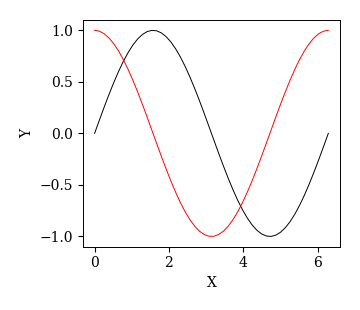

In [78]:
# FigureとAxesを生成する
fig, ax = plt.subplots()

# Axesに対してプロットする
x = np.linspace(0, 2*np.pi)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

# Axesを装飾する
ax.set_xlabel('X'); ax.set_ylabel('Y')

# Figureを保存する
fig.savefig('./1_axes.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300)

**（非推奨）方法２：MATLABスタイル**

MATLABスタイルの場合，FigureとAxesの生成は自動的に行われる．
オブジェクト指向スタイルでは生成したAxesに対して`ax.plot()`のようにプロットしたが，
MATLABスタイルでは，プロット，装飾，保存など全てのコマンドが`plt.`から始まる．
特に，グラフの装飾のコマンドに`set_`が付かないことに注意する．

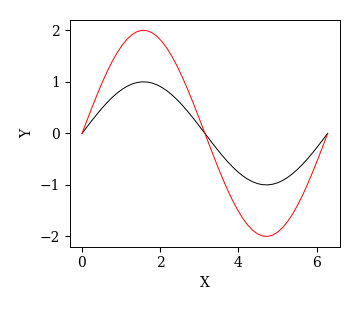

In [79]:
# プロットする
x = np.linspace(0, 2*np.pi)
plt.plot(x, np.sin(x))
plt.plot(x, 2*np.sin(x))

# Axesを装飾する
plt.xlabel('X'); plt.ylabel('Y')

# Figureを保存する
plt.savefig('./1_axes.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300)

### FigureとAxesの生成

**FigureとAxesを同時に生成**

`plt.subplots(nrows, ncols, option)`により，FigureとAxesを同時に生成できる．
通常は`nrows`と`ncols`を省略し，`fig, ax = plt.subplots()`のようにして1つのAxesだけを生成する．
複数のAxesを生成した場合は`nrows`に縦方向の分割数，`ncols`に横方向の分割数を指定する．
例えば，`nrows=2, ncols=3`とすると，2×3=6個のAxesが生成される．
これ以外に以下のオプションがある．

| オプション | 内容 | 指定の仕方 |
| ---- | ---- | ---- | 
| figsize | Figureのサイズ | (width, height) |
| facecolor | 背景の色 | 'white'（デフォルト）, 'red'など |
| tight_layout | 余白の自動調整 | True or False |
| linewidth | 枠線の太さ | 数値 |
| edgecolor | 枠線の色 | 'black', Noneなど |

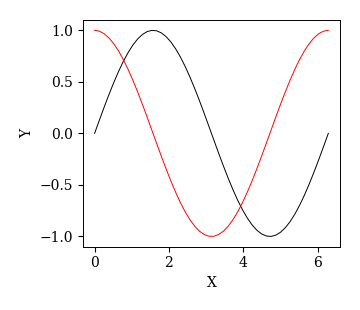

In [80]:
# Figureと1つのAxesを生成する
fig, ax = plt.subplots()

# Axesに対してプロットする
x = np.linspace(0, 2*np.pi)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

# Axesを装飾する
ax.set_xlabel('X'); ax.set_ylabel('Y')

# Figureを保存する
fig.savefig('./1_axes.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300)

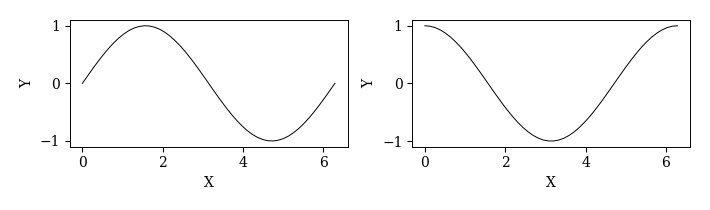

In [81]:
'''複数のAxes'''

# Figureと複数のAxesを生成する
fig, axs = plt.subplots(1, 2, figsize=(7, 2), facecolor='white', tight_layout=True)

# Axesに対してプロットする
x = np.linspace(0, 2*np.pi)
axs[0].plot(x, np.sin(x))
axs[1].plot(x, np.cos(x))

# Axesを装飾する
axs[0].set_xlabel('X'); axs[0].set_ylabel('Y')
axs[1].set_xlabel('X'); axs[1].set_ylabel('Y')

# Figureを保存する
fig.savefig('./2_axes.pdf', bbox_inches='tight')

**Figureを生成して，後からAxesを追加**

`fig = plt.figure()`でFigureのみを生成できる．オプションは`plt.subplots()`と同じ．
また，`fig.add_subplot(LMN)`でAxesを1つずつ追加できる．
ここで，Lは行方向の分割数，Mは列方向の分割数，Nは追加したいAxesの番号を表す．

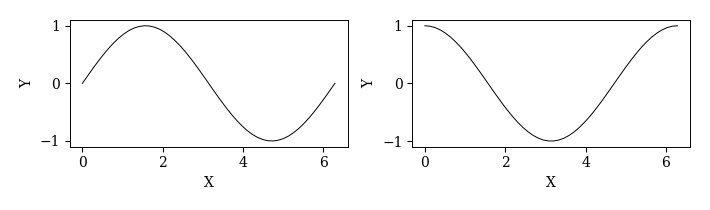

In [82]:
# Figureの生成
fig = plt.figure(figsize=(7, 2))

# Axesの追加
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Axesに対するプロット
x = np.linspace(0, 2*np.pi)
ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x))

# Axesの装飾
ax1.set_xlabel('X'); ax1.set_ylabel('Y')
ax2.set_xlabel('X'); ax2.set_ylabel('Y')

# Figureの保存
fig.savefig('./2_axes.pdf', bbox_inches='tight')

## イベントデータの解析

(pappalardo)=
### Pappalardoデータセットの詳細

#### データセットに関する情報の入手先

Pappalardoデータセットに含まれる全てのデータおよび付加情報は以下で入手できる．

- [データセットの詳細をまとめた論文](https://doi.org/10.1038/s41597-019-0247-7)
  - Pappalardo, L., Cintia, P., Rossi, A. et al. A public data set of spatio-temporal match events in soccer competitions. Sci Data 6, 236 (2019).
- [データの入手先（figshare）](https://figshare.com/collections/Soccer_match_event_dataset/4415000/5)
    - ページ最上部でデータセットのバージョンを選択できる（2023年6月現在の最新版はVersion 5）
    - ページ最下部からzipファイルやjsonファイルをダウンロードできる
- [Wyscout API](https://apidocs.wyscout.com)
    - Wyscout社のサポートページ
    - 各データに関する詳細な情報を掲載
- [日本語の解説サイト](https://exploratory.io/note/1021500949444839/Soccer-Analytics-01-Data-Description-OGp4kBq4Va/note_content/note.html
)
    - 日本語によるデータセットの詳細な説明（作成者に感謝）
    - 一部に情報が古い部分がある

#### データセットの内容

Pappalardoデータセットに含まれる試合は2017年度ヨーロッパリーグ，2018年度FIFAW杯，2016年度UEFAチャンピオンズリーグの全1941試合である．

| リーグ・大会名 | シーズン | 試合数 | イベント数 | 選手数 |
| ---- | ---- | ---- | ---- | ---- |
| スペイン１部リーグ| 2017-18 | 380 | 628659 | 619 |
| イングランド１部リーグ| 2017-18 | 380 | 643150 | 603 |
| イタリア１部リーグ| 2017-18 | 380 | 647372 | 686 |
| ドイツ１部リーグ| 2017-18 | 380 | 519407 | 537 |
| フランス１部リーグ| 2017-18 | 380 | 632807 | 629 |
| FIFA World Cup | 2018 | 64 | 101759 | 736 |
| UEFA Euro Cup | 2016 | 51 | 78140 | 552 |
| 計 |  | 1941 | 3251294 | 4299 |

Pappalardoデータセットには，下表のようなデータが含まれている．

| データ | ファイル形式 |
| ---- | ---- |
| イベントデータ．ボールに関わるイベントの発生時刻，位置，付加情報 | `events_competition-name.json` |
| リーグ・大会の情報 | `competitions.json` |
| 出場チームの情報 | `teams.json` |
| 出場選手の情報 | `players.json` |
| 審判の情報 | `referees.json` |
| コーチの情報 | `coaches.json` |
| イベントIDとイベント名の対応表 | `eventid2name.csv` |
| イベントに付与されるタグの説明 | `tags2name.csv` |

In [83]:
# イベントデータと選手プロフィールの読み込み
df_event = pd.read_csv('./event_England.csv')
df_tag = pd.read_csv('./event_tag_England.csv')
df_player = pd.read_csv('./player.csv', header=0)

# 特定の試合を抽出
df_event_game = df_event.loc[df_event['game_id']==2499719]
df_tag_game = df_tag.loc[df_event['game_id']==2499719]

### ボールの軌跡の可視化

イベントデータを用いると，パスやシュートなどのイベント単位で試合展開を追跡することができる．
ここでは，特定の試合に対し，ボールの軌跡を可視化してみよう．

**試合の抽出**

In [84]:
# 特定の試合を抽出
df_event_game = df_event.loc[df_event['game_id']==2499719].copy()
df_tag_game = df_tag.loc[df_event['game_id']==2499719].copy()

**チーム名の確認**

In [85]:
team_id = df_event_game['team_id'].unique()
team_id

array([1609, 1631])

**座標の反転（片方のチームだけ）**

元のデータでは，両チームの攻撃方向が右方向に統一されている．
これだと，試合展開を可視化する際にわかりにくいので，一方のチームの攻撃方向が逆になるように変換する．
以下のように，片方のチーム（'team_id'が1631）の$x, y$座標から最大値100を引き，絶対値を取ればよい．

In [86]:
df_event_game.loc[df_event_game['team_id']==team_id[1], ['x1', 'x2']] = np.abs(df_event_game.loc[df_event_game['team_id']==team_id[1], ['x1', 'x2']] - 100)
df_event_game.loc[df_event_game['team_id']==team_id[1], ['y1', 'y2']] = np.abs(df_event_game.loc[df_event_game['team_id']==team_id[1], ['y1', 'y2']] - 100)

# 座標の補正（コート外の座標を欠損値にする）
df_event_game.loc[(df_event_game['x1']==0)|(df_event_game['x2']==0), ['x2', 'y2']] = np.nan
df_event_game.loc[(df_event_game['x1']==100)|(df_event_game['x2']==100), ['x2', 'y2']] = np.nan

**ボールの軌跡の描画**

イベントログにはイベントの始点と終点の座標が収められており，これがおおよそボールの軌跡に対応する．
そこで，`matplotlib`の`plot`関数を用いてイベントの始点と終点の座標を結ぶことで，ボールの軌跡を描いてみる．
なお，イベント名が'duel'の場合，始点と終点の座標が同じで'team_id'が異なる2つの行が挿入されている．

In [87]:
df_event_game.loc[df_event_game['event']=='duel'].head()

,id,game_id,half,t,team_id,player_id,event,event_id,subevent,subevent_id,x1,y1,x2,y2
7,177959189,2499719,1,14.765,1631,8013,duel,1,air_duel,10.0,61.0,85.0,67.0,80.0
8,177961218,2499719,1,14.765,1609,0,duel,1,air_duel,10.0,61.0,85.0,67.0,80.0
12,177959191,2499719,1,21.878,1631,8653,duel,1,air_duel,10.0,71.0,54.0,50.0,59.0
13,177959181,2499719,1,22.552,1609,25413,duel,1,air_duel,10.0,71.0,54.0,50.0,59.0
22,177959205,2499719,1,38.192,1631,12829,duel,1,ground_loose_ball_duel,13.0,33.0,78.0,29.0,85.0


これは，ボール保持チームが特定できないためと考えられる．
そこで，イベント名が'duel'の場合には一方のチームの座標だけを黒線で描画し，それ以外はチームごとに色分けして描画することにする．
以下の`ball_trj`関数は，時間帯を３つの引数`half`, `ts`, `te`で指定し，その時間帯でボールの軌跡を描く．

In [88]:
def ball_trj(half=1, ts=0, te=50):
    '''
    half: 前半1， 後半2
    ts: 始点に対応する時刻
    te: 終点に対応する時刻
    '''
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_aspect(68/105)

    df_event_game['tmp'] = np.nan
    cond = (df_event_game['half']==1) & (df_event_game['t'] > ts) & (df_event_game['t'] < te)

    # チーム0のpass
    X0 = df_event_game.loc[cond & (df_event_game['team_id']==team_id[0]) & (df_event_game['event']!='duel'), ['x1', 'x2', 'tmp']].values.reshape(-1)
    Y0 = df_event_game.loc[cond & (df_event_game['team_id']==team_id[0]) & (df_event_game['event']!='duel'), ['y1', 'y2', 'tmp']].values.reshape(-1)
    ax.plot(X0, Y0, 'o-r', mfc='None')

    # チーム1のpass
    X1 = df_event_game.loc[cond & (df_event_game['team_id']==team_id[1]) & (df_event_game['event']!='duel'), ['x1', 'x2', 'tmp']].values.reshape(-1)
    Y1 = df_event_game.loc[cond & (df_event_game['team_id']==team_id[1]) & (df_event_game['event']!='duel'), ['y1', 'y2', 'tmp']].values.reshape(-1)
    ax.plot(X1, Y1, '^-b', mfc='None')

    # duel
    X2 = df_event_game.loc[cond & (df_event_game['team_id']==team_id[1]) & (df_event_game['event']=='duel'), ['x1', 'x2', 'tmp']].values.reshape(-1)
    Y2 = df_event_game.loc[cond & (df_event_game['team_id']==team_id[1]) & (df_event_game['event']=='duel'), ['y1', 'y2', 'tmp']].values.reshape(-1)
    ax.plot(X2, Y2, '-k')

    # ハーフウェイライン
    ax.plot([50, 50], [0, 100], 'k--') 

    # 描画範囲とラベル
    ax.set_xlim(0, 100); ax.set_ylim(0, 100)
    ax.set_xlabel('$X$'); ax.set_ylabel('$Y$')

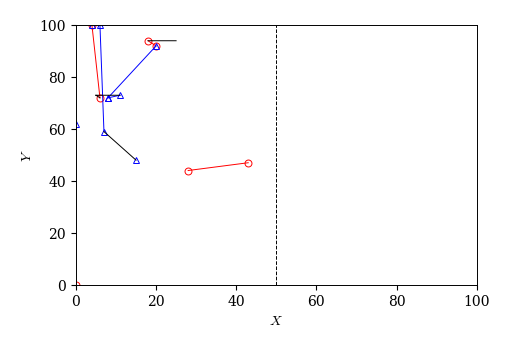

In [89]:
ball_trj(half=1, ts=100, te=200)

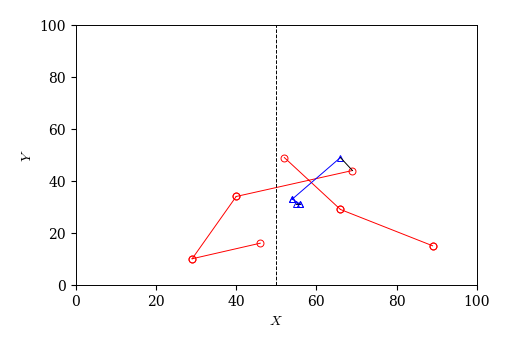

In [90]:
ball_trj(half=2, ts=2000, te=2050)

## トラッキングデータの解析

(pettersen)=
### Pettersenデータセットの詳細

#### データセットに関する情報の入手先

Pettersenデータセットの情報は以下で入手できる：

- [データの詳細をまとめた論文](https://www.researchgate.net/publication/260983291_Soccer_Video_and_Player_Position_Dataset)
  - S. A. Pettersen, D. Johansen, H. Johansen, V. Berg-Johansen, V. R. Gaddam, A. Mortensen, R. Langseth, C. Griwodz, H. K. Stensland, and P. Halvorsen: Proceedings of the 5th ACM Multimedia Systems Conference, 2014, pp. 18–23. https://doi.org/10.1145/2557642.2563677
- [データの入手先](https://datasets.simula.no/alfheim/)
  - Alfheim - Soccer video and player position dataset

Pettersenデータセットには以下の3試合のデータが含まれている：

| 日時 | 対戦カード | データの種類 | 備考 |
| ---- | ---- | ---- | ---- |
| 2013-11-03 | Tromsø IL - Strømsgodset | トラッキングデータ<br>試合映像 |  |
| 2013-11-07 | Tromsø IL - Anzhi | トラッキングデータ<br>試合映像 |  |
| 2013-11-28 | Tromsø IL - Tottenham Hotspurs | トラッキングデータ<br>試合映像<br>ボールの座標データ | 前半40分のみ<br>ボール座標は手作業で取得 |

トラッキングデータは以下の2種類の形式で用意されている：
- raw data：センサから取得した生データ
- interpolated data：時間単位を0.05秒に統一したデータ

トラッキングデータに含まれる変数は下表の通りである．

| 変数 | データ型 | 内容 | 例 |
| ---- | ---- | ---- | ---- |
| time | string | 時刻 | 18:01:09.05 |
| id | int | 選手の識別ID | Homeチームのみ．交代選手は新たなID． |
| $x$ | float | $x$座標 | 26.573 m |
| $y$ | float | $y$座標 | 29.436 m |
| heading | float | 選手の向き（センサから取得） | $y$軸からの角度（rad） |
| direction | float | 選手の移動方向 |  $y$軸からの角度（rad） |
| energy | float | エネルギー消費量 | 単位は不明 |
| speed | float | 選手の速さ | 0.968 m/s |
| total_distance | float | 試合開始からの移動距離 | 255.584 m |

**利用規約**

- 選手個人の再識別は禁止
- 選手・クラブのパフォーマンスプロファイルの作成は禁止
- 非営利的な研究目的での使用に限定

**トラッキングシステム**


- ZXYシステム
    - ZXY Sport Tracking system by ChyronHego (Trondheim, Norway)
- センサーベルト
    - 選手の胸下に装着
    - 重さ10g
    - 加速度センサ，ジャイロセンサ，心拍計，コンパスを搭載
    - 心拍データはデータセットから除外
    - レシーバーをスタジアム内に設置

### ボロノイ領域

2次元平面上に$N$個の個体（**母点**と呼ぶ）が配置されているとき，平面上の各点を「どの母点から最も近いか」という基準で分割する．
このとき，母点$p$から最も近い領域のことを母点$p$の**ボロノイ領域**と呼ぶ．
通常，近さの基準はユークリッド距離によって定める．
下図は，５つの母点に対するボロノイ領域の例である．
この中で，青色で示した領域は母点$p_{4}$から最も近い領域，すなわち母点$p_{4}$のボロノイ領域である．
また，黒丸（●）は各母点のボロノイ領域の交点，点線は境界線を表し，それぞれ**ボロノイ点**，**ボロノイ線**と呼ばれる．

チームスポーツにおいては母点を選手に対応させたボロノイ領域が用いられ，各選手の支配領域と解釈される．
このとき，ボロノイ線は２人の選手からの距離が等しく，ボロノイ点は２人以上の選手からの距離が等しい場所を表す．
よって，守備側チームのボロノイ線とボロノイ点は，攻撃側チームから見ると守備の穴になりやすい場所である．

なお，最近では，「選手$p$から最も近い領域」を「選手$p$から最も速く到達できる領域」に拡張した**優勢領域**が盛んに研究されている．
優勢領域を求めるには，各選手から平面上の全ての位置までの到達時間を計算する必要がある．
この計算に用いられるモデルは**運動モデル**と呼ばれ，運動方程式や機械学習に基づく様々なモデルが提案されている．

```{figure} ../figure/voronoi.png
---
height: 250px
name: fig:voronoi
---
ボロノイ図の例
```

Pythonには科学技術計算のためのライブラリであるSciPyが用意されており，Anacondaをインストールすれば標準で使うことができる．
ボロノイ領域の計算には，scipy.spatialモジュールに含まれる`Voronoi`クラスおよび`voronoi_plot_2d`関数を用いる．
まずはこれらを以下のようにインポートする．

In [91]:
from scipy.spatial import Voronoi, voronoi_plot_2d

ボロノイ領域の計算と描画の手順は以下の通りである：
1. ボロノイ領域を計算したい母点の座標を取得する
2. `Voronoi`クラスを用いてオブジェクト（インスタンス）を生成する
    ```python
    vor = Voronoi(xy)
    ```
3. `voronoi_plot_2d`関数を用いてボロノイ領域を描画する
4. 生成したオブジェクト`vor`の属性やメソッドを用いてボロノイ領域の情報を取得する

**母点の生成**

母点の座標はNumPy配列の形で第0列に$x$座標，第1列に$y$座標となるように用意する．
以下ではランダムに5つの母点を生成し`xy`という変数に読み込む．

In [95]:
xy = np.random.rand(5, 2)
xy

array([[0.377, 0.083],
       [0.453, 0.408],
       [0.022, 0.878],
       [0.322, 0.631],
       [0.236, 0.52 ]])

**`Voronoi`クラスによるオブジェクトの生成**

生成した母点の座標`xy`をscipy.spatialからインポートした`Voronoi`クラスに読み込んで`vor`オブジェクトを生成する．

In [96]:
# ボロノイ分割の計算（オブジェクトの生成）
vor = Voronoi(xy)

**ボロノイ領域の描画**

ボロノイ領域の描画には`voronoi_plot_2d`関数を用いる．
引数には生成した`vor`オブジェクトを渡す．

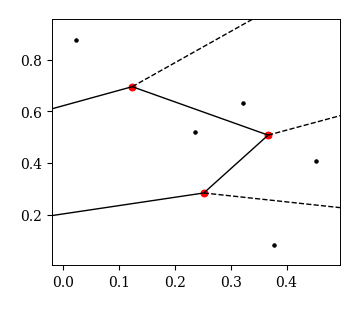

In [98]:
fig = voronoi_plot_2d(vor)

**ボロノイ領域の情報の取得**

生成した`vor`オブジェクトの属性を用いることで，ボロノイ領域の様々な情報を取得できる．

In [99]:
# 母点の座標
vor.points

array([[0.377, 0.083],
       [0.453, 0.408],
       [0.022, 0.878],
       [0.322, 0.631],
       [0.236, 0.52 ]])

In [100]:
# ボロノイ点の座標
vor.vertices

array([[-1.531, -0.291],
       [ 0.252,  0.284],
       [ 0.124,  0.695],
       [ 0.367,  0.508]])

ボロノイ線の情報は`vor.ridge_vertices`により，両端にあるボロノイ点の番号として取得できる．
この番号は，`vor.vertices`のインデックスに対応しており，ボロノイ点が無限遠の場合は-1となる．

In [101]:
# ボロノイ線リスト（vor.verticesのインデックスで表現）
# -1は無限に伸びるボロノイ線のを表す
vor.ridge_vertices

[[-1, 0], [-1, 1], [0, 1], [2, 3], [-1, 2], [-1, 3], [0, 2], [1, 3]]

この例の場合，１つ目のボロノイ線は[-1, 0]なので，0番目のボロノイ点が無限遠まで延びることが分かる．
以下のように無限遠点を除くボロノイ線を取得しておくと便利である．

In [102]:
# ボロノイ線の両端にあるボロノイ点の座標
ind_rv = np.array(vor.ridge_vertices)
ind_rv[~np.any(ind_rv == -1, axis=1)]
vor.vertices[ind_rv]

array([[[ 0.367,  0.508],
        [-1.531, -0.291]],

       [[ 0.367,  0.508],
        [ 0.252,  0.284]],

       [[-1.531, -0.291],
        [ 0.252,  0.284]],

       [[ 0.124,  0.695],
        [ 0.367,  0.508]],

       [[ 0.367,  0.508],
        [ 0.124,  0.695]],

       [[ 0.367,  0.508],
        [ 0.367,  0.508]],

       [[-1.531, -0.291],
        [ 0.124,  0.695]],

       [[ 0.252,  0.284],
        [ 0.367,  0.508]]])

ボロノイ線と同様にして，`vor.regions`を用いると，各母点のボロノイ領域を構成するボロノイ点のリストを取得することができる：

In [103]:
# 各ボロノイ領域を構成するボロノイ点のインデックス
vor.regions

[[1, -1, 0], [-1, 3, 2], [3, 1, 0, 2], [-1, 0, 2], [-1, 1, 3], []]

**トラッキングデータへの応用**

サッカーのトラッキングデータからボロノイ領域を描画するには，特定のフレームにおける選手の座標を取得し，それを母点として`Voronoi`クラスのオブジェクトを生成すれば良い．
ただし，ボロノイ領域の描画に`voronoi_plot_2d`をそのまま用いると，無限に延びるボロノイ線が途中で切れてしまうという問題が発生する．
そこで，ここでは[`voronoi_plot_2d`のソースコード](https://github.com/scipy/scipy/blob/v1.8.1/scipy/spatial/_plotutils.py#L151-L265)を参考に，独自の描画関数`my_voronoi_plot_2d`を以下のように作成する．

In [104]:
def my_voronoi_plot_2d(vor, fig, ax):

    # ボロノイ点の描画
    ax.plot(vor.vertices[:, 0], vor.vertices[:, 1], '.')

    # ボロノイ線の描画
    center = vor.points.mean(axis=0)  # 母点の重心
    for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
        simplex = np.asarray(simplex)

        # 有限なボロノイ線
        if np.all(simplex >= 0): # 両端のボロノイ点が共に有限
            ax.plot(vor.vertices[simplex, 0], vor.vertices[simplex, 1], 'k--')

        # 無限に延びるボロノイ線
        else: # 両端のボロノイ点のどちらかが無限

            # 有限なボロノイ点
            i = simplex[simplex >= 0][0]

            # ボロノイ線の両脇にある母点を結んだベクトル（ドロネー線）
            t = vor.points[pointidx[1]] - vor.points[pointidx[0]]
            t = t / np.linalg.norm(t)

            # t（ドロネー線）に直行するベクトル
            n = np.array([-t[1], t[0]])

            # tの中点
            midpoint = vor.points[pointidx].mean(axis=0)

            # 無限遠方のボロノイ点
            pm = np.sign(np.dot(midpoint - center, n)) # 符号
            far_point = vor.vertices[i] + 1000 * pm * n  # 無限遠点の座標

            ax.plot([vor.vertices[i,0], far_point[0]], [vor.vertices[i,1], far_point[1]], 'k--')

`my_voronoi_plot_2d`関数は，`vor`オブジェクトとmatplotlibの`fig, ax`オブジェクトを読み込み，ボロノイ点とボロノイ線を描画する．
ただし，母点の座標はmatplotlibで描画する必要がある．
以下は，トラッキングデータから第$i$フレームの座標を取得し，ボロノイ領域を描画する例である．

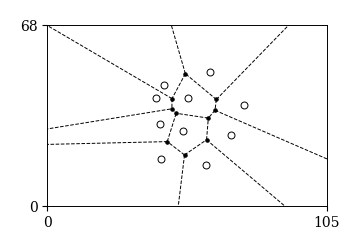

In [118]:
# トラッキングデータの読み込み
X = pd.read_csv('./x_1st.csv', encoding='utf-8', index_col=0)
Y = pd.read_csv('./y_1st.csv', encoding='utf-8', index_col=0)

# 第iフレームの座標取得
i=5000
x, y = X.loc[i], Y.loc[i]
xy = np.vstack([x, y]).T

# ボロノイ領域の計算（オブジェクトの生成）
vor = Voronoi(xy)

# ボロノイ領域の描画
fig, ax = plt.subplots(figsize=(3.5, 3))
my_voronoi_plot_2d(vor, fig, ax)

# 母点の描画
ax.plot(vor.points[:, 0], vor.points[:, 1], 'ko', mfc='None')

ax.set_xlim(0, 105); ax.set_ylim(0, 68)
ax.set_xticks([0, 105])
ax.set_yticks([0, 68])
ax.set_aspect('equal')

### ドロネーネットワーク

ある程度幅のある時間帯から選手の平均位置を求めてフォーメーションを可視化するには重心系で平均位置と標準偏差を求めれば良い．
では，特定の時刻においてフォーメーションを定量化・可視化するにはどうすればよいだろうか？
各時刻において4-4-2や3-4-3などの数字の組を割り当てるのも一つの方法かもしれないが，実はもっと便利な方法がある．
それが以下に説明するドロネーネットワークである．

個体$p_{i}$と$p_{j}$のボロノイ領域が隣接しているときにこれらの個体同士を線で結ぶと，下のような図が作成できる．
これを**ドロネー図**あるいは**ドロネーネットワーク**と呼ぶ．
下図を見て分かるように，ドロネーネットワークは各母点を頂点とする三角形に分割できるので，**ドロネー三角形分割**と呼ぶこともある．
ドロネーネットワークは線が張られた個体間に1，その他に0を割り当てた隣接行列によって定量化される．

ドロネーネットワークは平面において隣接関係を定義する方法として知られている．
そこで，チームスポーツにおけるフォーメーションを「選手同士の隣接関係」と捉えると，ドロネーネットワークによってフォーメーションを定量化することができる．
これにより，フォーメーションの可視化や時間変化の解析など様々な応用が期待される．

```{figure} ../figure/delaunay.png
---
height: 250px
name: fig:delaunay
---
ドロネーネットワークの例
```

scipy.spatialにはドロネーネットワークを計算・描画するための`Delaunay`クラスと`delaunay_plot_2d`が用意されている．
まずはこれらを以下のようにインポートする．

In [125]:
from scipy.spatial import Delaunay, delaunay_plot_2d

ドロネーネットワークの計算と描画の手順はボロノイ領域と同様である：
1. ドロネーネットワークを計算したい母点の座標を取得する
2. `Delaunay`クラスを用いてオブジェクトを生成する
    ```python
    dt = Delaunay(xy)
    ```
3. `delaunay_plot_2d`関数を用いてドロネーネットワークを描画する
4. 生成したオブジェクト`dt`の様々な属性やメソッドを用いてドロネーネットワーク領域の情報を取得する

**母点の生成**

母点の座標はNumPy配列の形で第0列に$x$座標，第1列に$y$座標となるように格納する．
以下ではランダムに10個の母点を生成し`xy`という変数に読み込んでいる．

In [126]:
# 母点の生成: [[x1, y1], [x2, y2], ... ,[xn, yn]]
N = 5
xy = np.random.rand(N, 2) 

**`Delaunay`クラスによるオブジェクトの生成**

生成した母点の座標`xy`をscipy.spatialからインポートした`Delaunay`クラスに読み込んで`dt`オブジェクトを生成する．

In [127]:
# ドロネー分割の計算
dt = Delaunay(xy)

**ドロネーネットワークの描画**

scipyにはドロネーネットワークを描画する`delaunay_plot_2d`関数が用意されており，[ソースコード](https://github.com/scipy/scipy/blob/v1.8.1/scipy/spatial/_plotutils.py#L36-L89)にアクセスできる．
ここでは，ボロノイ領域と同様に，このソースコードを少し改変した`my_delaunay_plot_2d`関数を以下のように作成し使用する．

In [128]:
def my_delaunay_plot_2d(dt, fig, ax):
    x, y = dt.points.T
    ax.triplot(x, y, dt.simplices.copy(), color='b', linestyle='-')

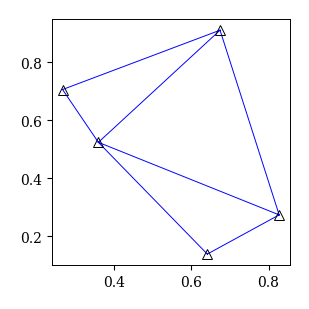

In [129]:
# プロット
fig, ax = plt.subplots(figsize=(3, 3))
my_delaunay_plot_2d(dt, fig, ax)
ax.plot(xy[:, 0], xy[:, 1], 'k^', mfc='None', ms=7)

**ドロネーネットワークの情報の取得**

In [130]:
# 母点の座標の取得
dt.points

array([[0.641, 0.139],
       [0.266, 0.707],
       [0.359, 0.524],
       [0.827, 0.274],
       [0.674, 0.911]])

In [131]:
# 各三角形を構成する母点のインデックス
ind_spx = dt.simplices 

# 0番目の三角形を構成する3つの母点の座標
xy[ind_spx[0]]

array([[0.359, 0.524],
       [0.674, 0.911],
       [0.266, 0.707]])

In [132]:
# 隣接行列の作成
A = np.zeros([N, N])
indices, indptr = dt.vertex_neighbor_vertices
for k in range(N):
    nbr = indptr[indices[k]:indices[k+1]] # k番目の母点の隣接点
    A[k][nbr] = 1
A

array([[0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0.]])

**トラッキングデータへの応用**

サッカーのトラッキングデータからドロネーネットワークを描画するには，特定のフレームにおける選手の座標を取得し，それを母点として`Delaunay`クラスのオブジェクトを生成すれば良い．

In [133]:
X = pd.read_csv('./x_1st.csv', encoding='utf-8', index_col=0)
Y = pd.read_csv('./y_1st.csv', encoding='utf-8', index_col=0)

# 第iフレームの座標取得
i=2000
x, y = X.loc[i], Y.loc[i]
xy = np.vstack([x, y]).T

# ドロネーネットワークの計算
dt = Delaunay(xy)

# ボロノイ領域の計算
vor = Voronoi(xy)

以下はドロネーネットワークとボロノイ領域を同時に描画する例である．

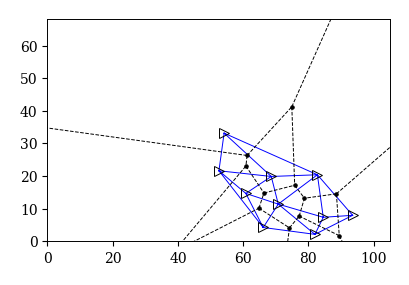

In [134]:
fig, ax = plt.subplots(figsize=(4, 4))

# 母点
ax.plot(vor.points[:, 0], vor.points[:, 1], 'k>', mfc='None', ms=7)

# ボロノイ領域
my_voronoi_plot_2d(vor, fig, ax)

# ドロネーネットワーク
my_delaunay_plot_2d(dt, fig, ax)

ax.set_xlim(0, 105); ax.set_ylim(0, 68)
ax.set_aspect('equal')